<a href="https://colab.research.google.com/github/saktheeswaranswan/random-math-addition-data-for-rnn-generator/blob/main/homotopy_2d_3d_curves_surfaces_parametric_implicit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

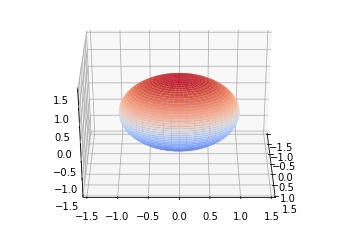

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate 3D coordinates of a sphere
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 50)
x = np.outer(np.sin(phi), np.cos(theta))
y = np.outer(np.sin(phi), np.sin(theta))
z = np.outer(np.cos(phi), np.ones_like(theta))

# Generate sphere inversion animation
def update(frame):
    ax.clear()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.plot_surface(x, y, z, cmap="coolwarm")
    ax.view_init(elev=30, azim=frame)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=False)
ani.save("sphere_inversion.mp4", writer="ffmpeg", dpi=100, bitrate=4000)
plt.show()


In [1]:
!pip install vispy




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.9/978.9 KB 31.2 MB/s eta 0:00:00


In [3]:
import numpy as np
from vispy import app, scene

# Create a sphere mesh
phi, theta = np.linspace(0, np.pi, 50), np.linspace(0, 2 * np.pi, 50)
x = np.outer(np.sin(phi), np.cos(theta))
y = np.outer(np.sin(phi), np.sin(theta))
z = np.outer(np.cos(phi), np.ones_like(theta))

# Generate animation
class Canvas(scene.SceneCanvas):
    def __init__(self):
        super().__init__(keys="interactive", size=(600, 600), show=True)
        self.unfreeze()

        # Create a sphere
        sphere = scene.visuals.Sphere(method="latitude", parent=self.scene, radius=1)
        sphere.transform = scene.STTransform(translate=(0, 0, -2))

        # Start animation
        app.Timer("auto", connect=self.on_timer, start=True)
        self.azimuth = 0

    def on_timer(self, event):
        self.azimuth += .5
        self.scene.camera = scene.TurntableCamera(elevation=30, azimuth=self.azimuth)
        self.update()

# Run the animation
if __name__ == '__main__':
    c = Canvas()
    app.run()


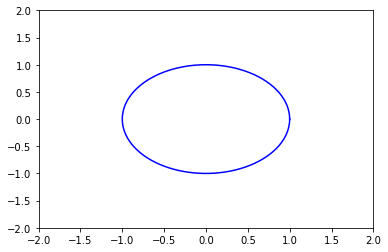

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametric equations of the two curves
def f1(t):
    return np.array([np.cos(t), np.sin(t)])

def f2(t):
    return np.array([np.cos(t)**3, np.sin(t)**3])

# Homotopy function between the two curves
def h(t, s):
    return (1-s) * f1(t) + s * f2(t)

# Generate homotopy animation
def update(frame):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    t = np.linspace(0, 2*np.pi, 100)
    curve = h(t, frame/100)
    ax.plot(*curve, c="blue")

fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
ani.save("homotopy.mp4", writer="ffmpeg", dpi=100, bitrate=4000)
plt.show()


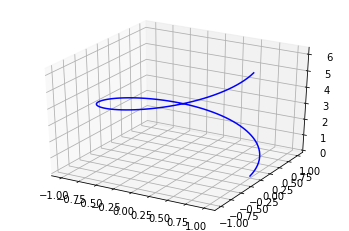

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two curves
def f1(t):
    return np.array([np.cos(t), np.sin(t), t])

def f2(t):
    return np.array([np.cos(t)**3, np.sin(t)**3, t**3])

# Homotopy function between the two curves
def h(t, s):
    return (1-s) * f1(t) + s * f2(t)

# Generate homotopy animation
def update(frame):
    ax.clear()
    t = np.linspace(0, 2*np.pi, 100)
    curve = h(t, frame/100)
    ax.plot(*curve, c="blue")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
ani.save("homotopy.mp4", writer="ffmpeg", dpi=100, bitrate=4000)
plt.show()


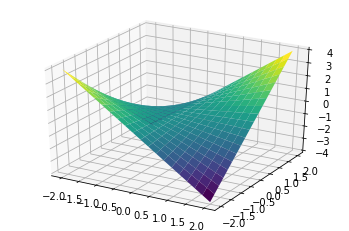

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([u, v, u*v])

def f2(u, v):
    return np.array([u, v, u**3 + v**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(-2, 2, 20)
    v = np.linspace(-2, 2, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    ax.plot_surface(*surface, cmap="viridis")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
ani.save("homotopy.mp4", writer="ffmpeg", dpi=100, bitrate=4000)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([u, v, u*v])

def f2(u, v):
    return np.array([u, v, u**3 + v**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(-2, 2, 20)
    v = np.linspace(-2, 2, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("surface(u, v) = ", end="")
    print("(1-{:.2f}) * f1(u, v) + {:.2f} * f2(u, v)".format(frame/100, frame/100))
    
    ax.plot_surface(*surface, cmap="viridis")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
plt.show()


surface(u, v) = (1-0.00) * f1(u, v) + 0.00 * f2(u, v)


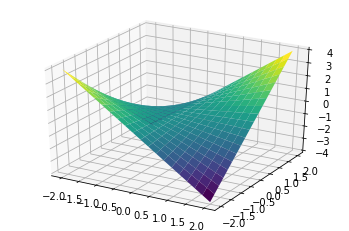

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([u, v, u*v])

def f2(u, v):
    return np.array([u, v, u**3 + v**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(-2, 2, 20)
    v = np.linspace(-2, 2, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("surface(u, v) = ", end="")
    print("(1-{:.2f}) * f1(u, v) + {:.2f} * f2(u, v)".format(frame/100, frame/100))
    
    ax.plot_surface(*surface, cmap="viridis")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
plt.show()


curve(t) = (1-0.00) * f1(t) + 0.00 * f2(t)


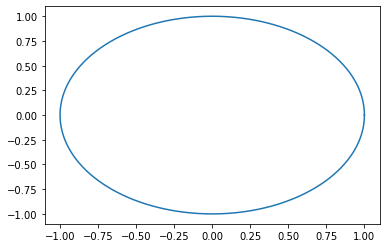

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametric equations of the two curves
def f1(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)])

def f2(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)**3])

# Homotopy function between the two curves
def h(t, s):
    return (1-s) * f1(t) + s * f2(t)

# Generate homotopy animation
def update(frame):
    ax.clear()
    t = np.linspace(0, 1, 1000)
    curve = h(t, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("curve(t) = ", end="")
    print("(1-{:.2f}) * f1(t) + {:.2f} * f2(t)".format(frame/100, frame/100))
    
    ax.plot(*curve)

fig = plt.figure()
ax = fig.add_subplot(111)
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
plt.show()


curve(t) = (1-0.00) * f1(t) + 0.00 * f2(t)


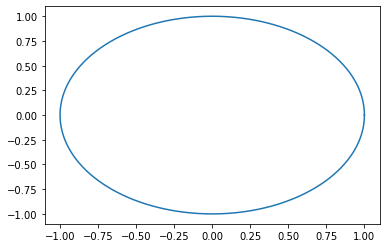

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametric equations of the two curves
def f1(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)])

def f2(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)**3])

# Homotopy function between the two curves
def h(t, s):
    return (1-s) * f1(t) + s * f2(t)

# Generate homotopy animation
def update(frame):
    ax.clear()
    t = np.linspace(0, 1, 1000)
    curve = h(t, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("curve(t) = ", end="")
    print("(1-{:.2f}) * f1(t) + {:.2f} * f2(t)".format(frame/100, frame/100))
    
    ax.plot(*curve)

fig = plt.figure()
ax = fig.add_subplot(111)
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametric equations of the two curves
def f1(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)])

def f2(t):
    return np.array([np.cos(2*np.pi*t), np.sin(2*np.pi*t)**3])

# Homotopy function between the two curves
def h(t, s):
    return (1-s) * f1(t) + s * f2(t)

# Generate homotopy animation
def update(frame):
    ax.clear()
    t = np.linspace(0, 1, 1000)
    curve = h(t, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("curve(t) = ", end="")
    print("(1-{:.2f}) * f1(t) + {:.2f} * f2(t)".format(frame/100, frame/100))
    
    ax.plot(*curve)

fig = plt.figure()
ax = fig.add_subplot(111)
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
plt.show()


surface(u,v) = (1-0.00) * f1(u,v) + 0.00 * f2(u,v)


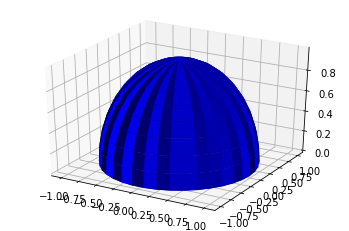

In [10]:
import numpy as np
import matplotlib.pyplot as mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)])

def f2(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(0, np.pi, 20)
    v = np.linspace(0, 2*np.pi, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    X, Y, Z = surface
    
    # Print the deformed function in wxMaxima syntax
    print("surface(u,v) = ", end="")
    print("(1-{:.2f}) * f1(u,v) + {:.2f} * f2(u,v)".format(frame/100, frame/100))
    
    ax.plot_surface(X, Y, Z, color='b')

fig = mplot3d.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
mplot3d.show()


surface(u,v) = (1-0.00) * f1(u,v) + 0.00 * f2(u,v)


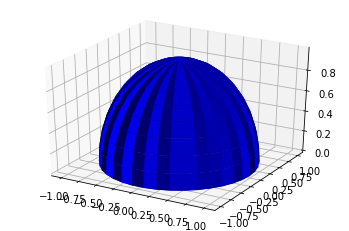

In [11]:
import numpy as np
import matplotlib.pyplot as mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)])

def f2(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(0, np.pi, 20)
    v = np.linspace(0, 2*np.pi, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    X, Y, Z = surface
    
    # Print the deformed function in wxMaxima syntax
    print("surface(u,v) = ", end="")
    print("(1-{:.2f}) * f1(u,v) + {:.2f} * f2(u,v)".format(frame/100, frame/100))
    
    ax.plot_surface(X, Y, Z, color='b')

fig = mplot3d.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
mplot3d.show()



surface(u,v) = (1-0.00) * f1(u,v) + 0.00 * f2(u,v)


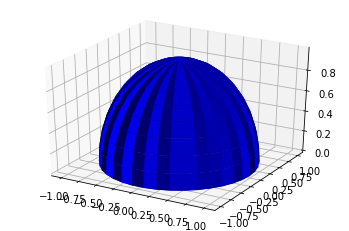

In [12]:
import numpy as np
import matplotlib.pyplot as mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parametric equations of the two surfaces
def f1(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)])

def f2(u, v):
    return np.array([np.cos(u)*np.cos(v), np.cos(u)*np.sin(v), np.sin(u)**3])

# Homotopy function between the two surfaces
def h(u, v, s):
    return (1-s) * f1(u, v) + s * f2(u, v)

# Generate homotopy animation
def update(frame):
    ax.clear()
    u = np.linspace(0, np.pi, 20)
    v = np.linspace(0, 2*np.pi, 20)
    U, V = np.meshgrid(u, v)
    surface = h(U, V, frame/100)
    X, Y, Z = surface
    
    # Print the deformed function in wxMaxima syntax
    print("surface(u,v) = ", end="")
    print("(1-{:.2f}) * f1(u,v) + {:.2f} * f2(u,v)".format(frame/100, frame/100))
    
    ax.plot_surface(X, Y, Z, color='b')

fig = mplot3d.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
mplot3d.show()


surface(x,y,z) = (1-0.00) * g1(x,y,z) + 0.00 * g2(x,y,z)


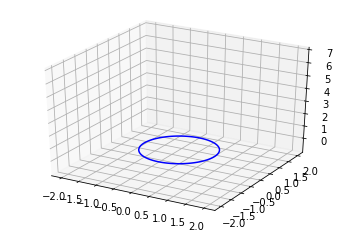

In [13]:
import numpy as np
import matplotlib.pyplot as mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Implicit equation of the two surfaces
def g1(x, y, z):
    return x**2 + y**2 + z**2 - 1

def g2(x, y, z):
    return x**2 + y**2 + z**2 - 4

# Homotopy function between the two surfaces
def h(x, y, z, s):
    return (1-s) * g1(x, y, z) + s * g2(x, y, z)

# Generate homotopy animation
def update(frame):
    ax.clear()
    x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = h(X, Y, 0, frame/100)
    
    # Print the deformed function in wxMaxima syntax
    print("surface(x,y,z) = ", end="")
    print("(1-{:.2f}) * g1(x,y,z) + {:.2f} * g2(x,y,z)".format(frame/100, frame/100))
    
    ax.contour(X, Y, Z, [0], colors='b')

fig = mplot3d.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=np.arange(0, 101, 2), repeat=False)
mplot3d.show()
